In [1]:
# Step 4: Data Cleaning

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries of interest
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)]

# Drop rows with missing 'date' or 'total_cases'
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])

# Fill remaining missing numeric values with forward fill
df_filtered = df_filtered.fillna(method='ffill')

# Show cleaned data preview
df_filtered.head()


NameError: name 'pd' is not defined

In [ ]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Step 3: Explore the dataset
print("✅ Columns:\n", df.columns)
print("\n✅ First 5 rows:\n", df.head())
print("\n✅ Missing values per column:\n", df.isnull().sum())


✅ Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed

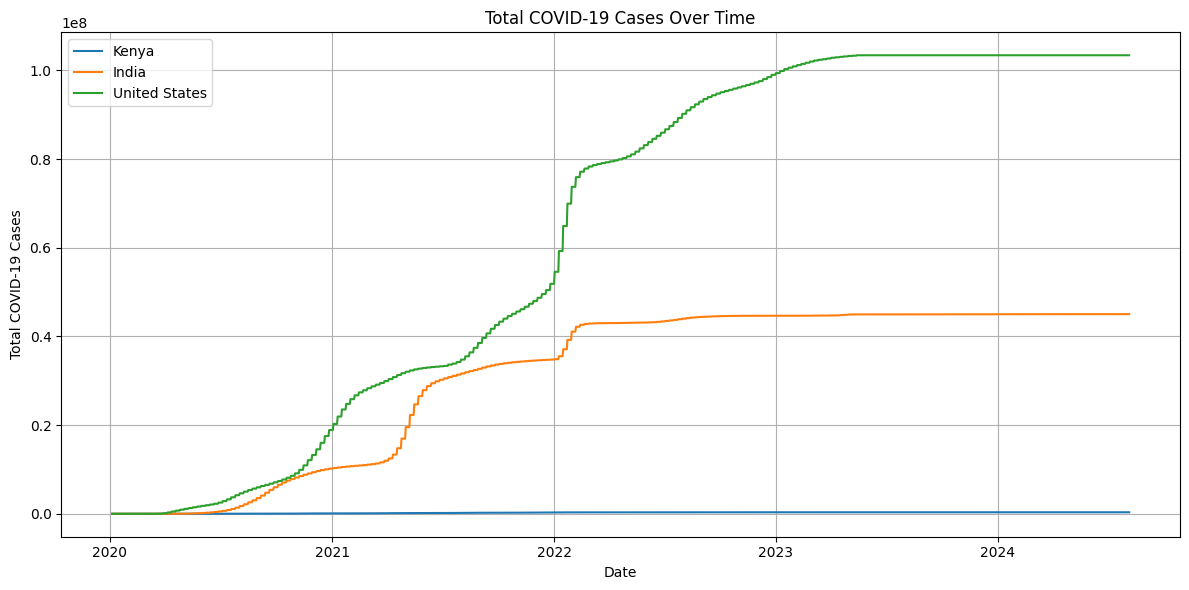

In [ ]:
# Step 5: EDA - Total COVID-19 Cases Over Time

import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(12, 6))

# Plot for each country
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


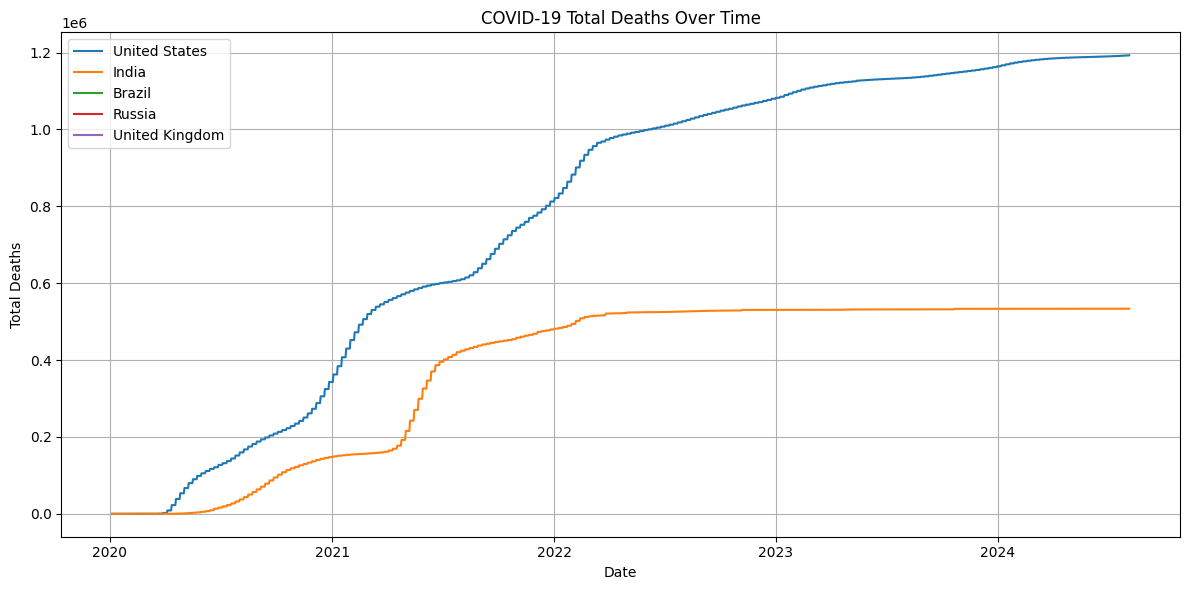

In [ ]:
import matplotlib.pyplot as plt

# Select countries for comparison
countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom']

# Plot death trends
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('COVID-19 Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


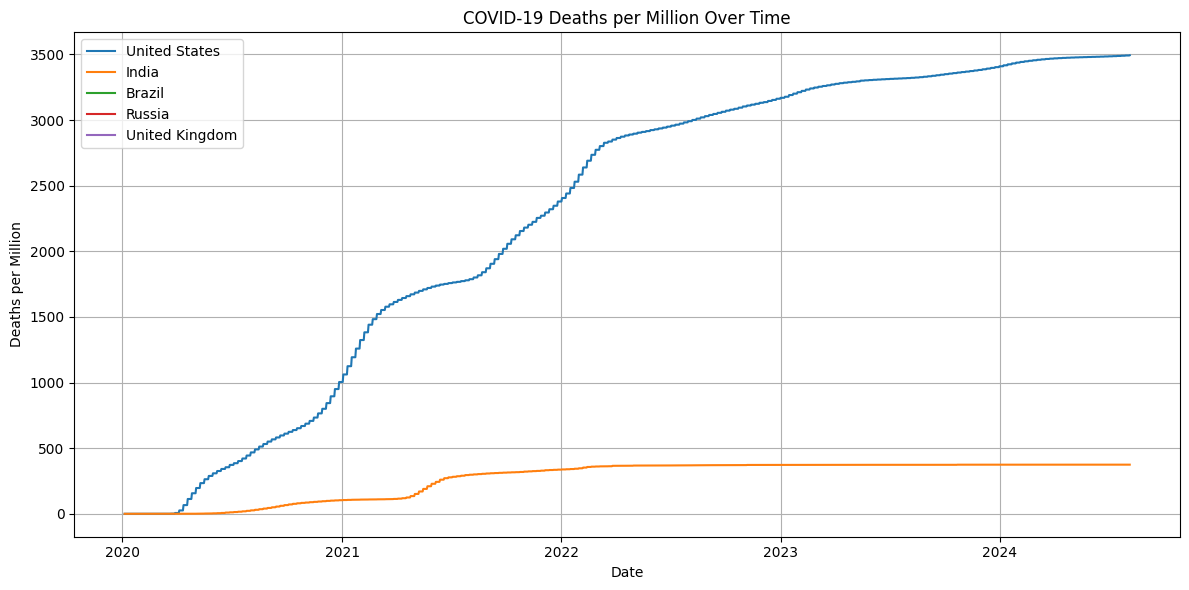

In [ ]:
# Plot deaths per million trends
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths_per_million'], label=country)

plt.title('COVID-19 Deaths per Million Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths per Million')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


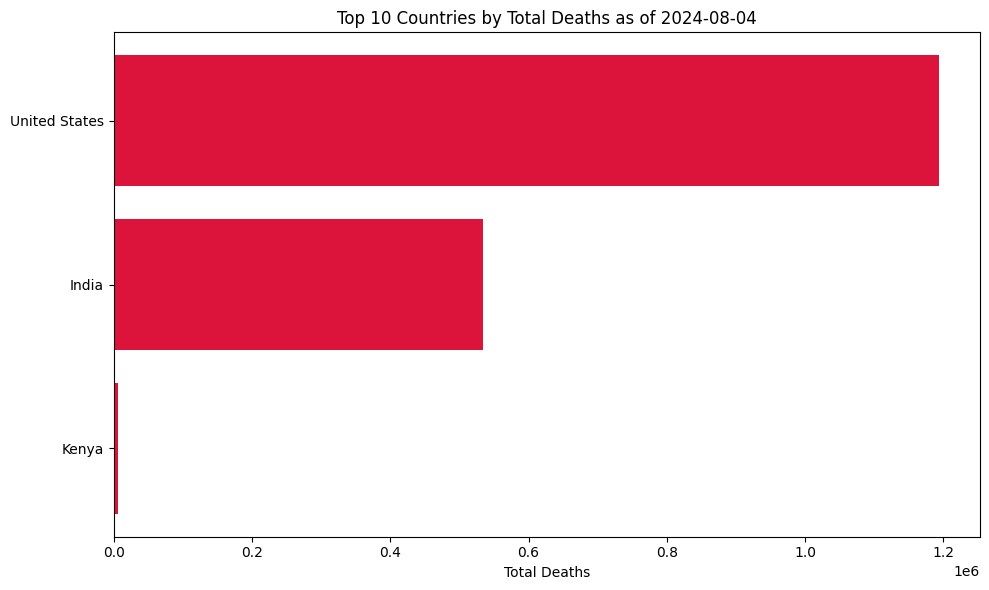

In [ ]:
# Get the latest date in the dataset
latest_date = df_filtered['date'].max()

# Filter data for the latest date
latest_data = df_filtered[df_filtered['date'] == latest_date]

# Sort and get top 10 countries by total deaths
top_deaths = latest_data[['location', 'total_deaths']].dropna()
top_deaths = top_deaths.sort_values(by='total_deaths', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_deaths['location'], top_deaths['total_deaths'], color='crimson')
plt.xlabel('Total Deaths')
plt.title(f'Top 10 Countries by Total Deaths as of {latest_date.date()}')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


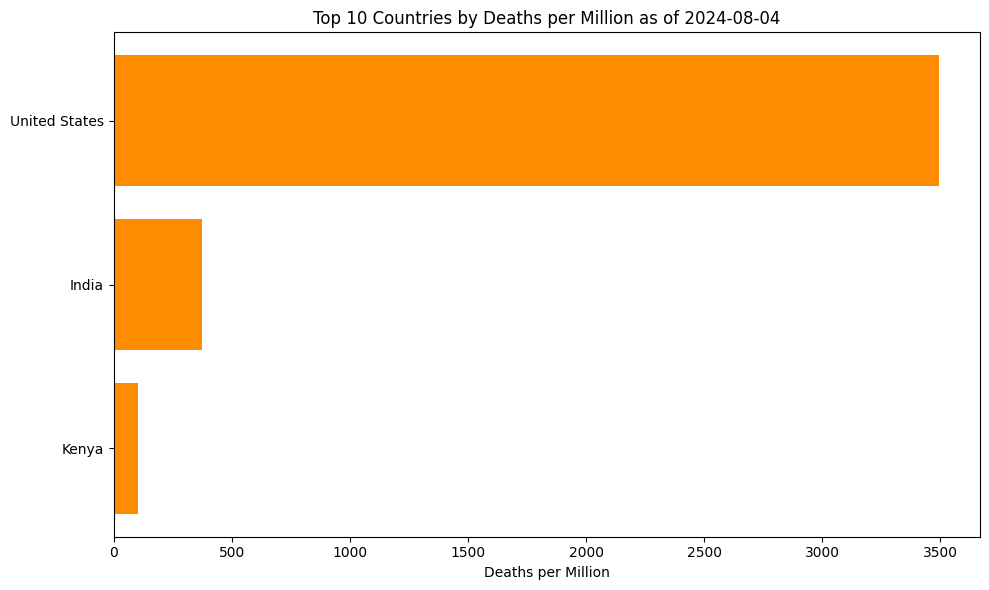

In [ ]:
# Filter data for the latest date
latest_data = df_filtered[df_filtered['date'] == latest_date]

# Sort and get top 10 countries by deaths per million
top_deaths_per_million = latest_data[['location', 'total_deaths_per_million']].dropna()
top_deaths_per_million = top_deaths_per_million.sort_values(
    by='total_deaths_per_million', ascending=False
).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_deaths_per_million['location'], top_deaths_per_million['total_deaths_per_million'], color='darkorange')
plt.xlabel('Deaths per Million')
plt.title(f'Top 10 Countries by Deaths per Million as of {latest_date.date()}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


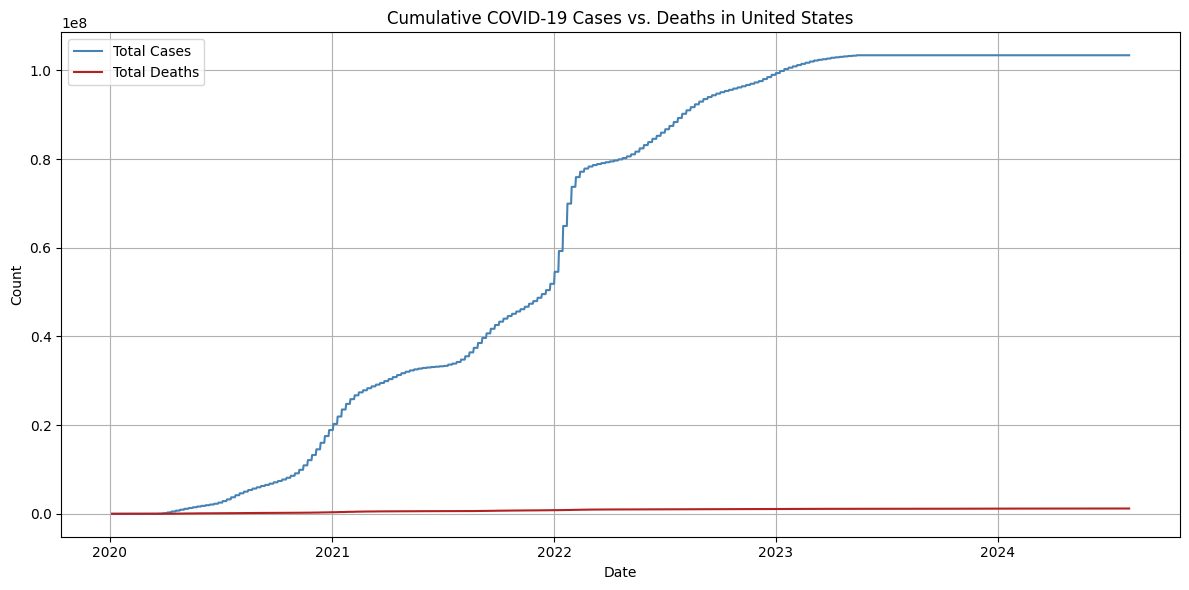

In [ ]:
# Choose a country to analyze
country = 'United States'  # Change this to any country you'd like

# Filter data
country_data = df_filtered[df_filtered['location'] == country]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(country_data['date'], country_data['total_cases'], label='Total Cases', color='steelblue')
plt.plot(country_data['date'], country_data['total_deaths'], label='Total Deaths', color='firebrick')

plt.title(f'Cumulative COVID-19 Cases vs. Deaths in {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


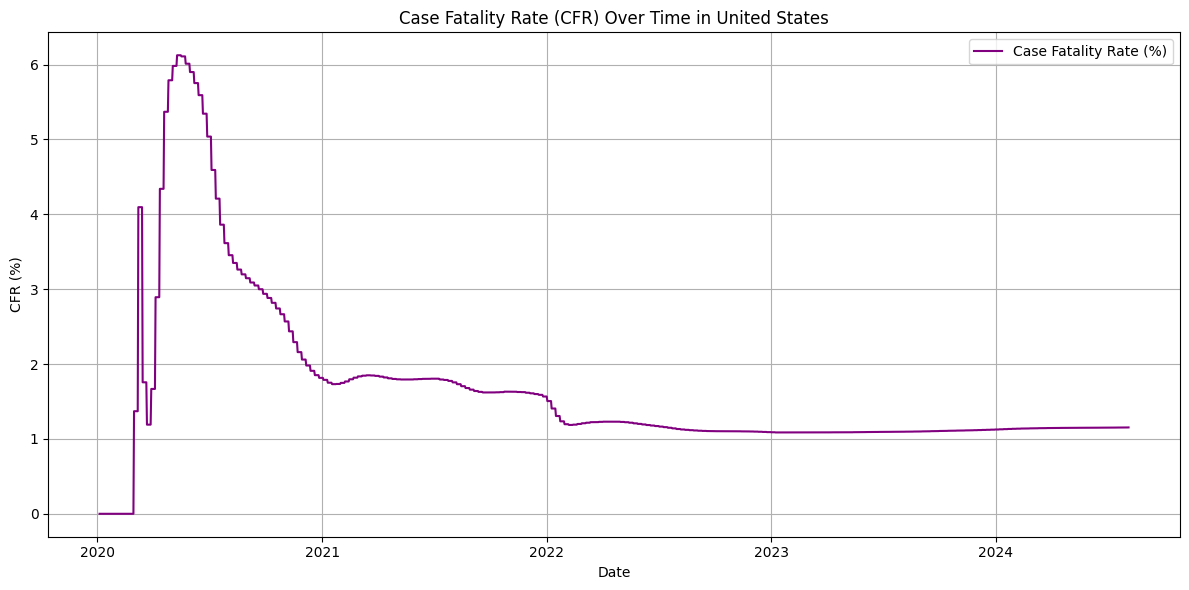

In [ ]:
# Choose a country
country = 'United States'  # Change this as needed

# Filter data for the country
country_data = df_filtered[df_filtered['location'] == country].copy()

# Calculate CFR and handle divide-by-zero issues
country_data['CFR'] = (country_data['total_deaths'] / country_data['total_cases']) * 100
country_data['CFR'] = country_data['CFR'].fillna(0)

# Plot CFR over time
plt.figure(figsize=(12, 6))
plt.plot(country_data['date'], country_data['CFR'], color='purple', label='Case Fatality Rate (%)')

plt.title(f'Case Fatality Rate (CFR) Over Time in {country}')
plt.xlabel('Date')
plt.ylabel('CFR (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
